## Airline Customer satisfication Prediction

### Context

We have dataset that contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Trying to predict passenger satisfaction

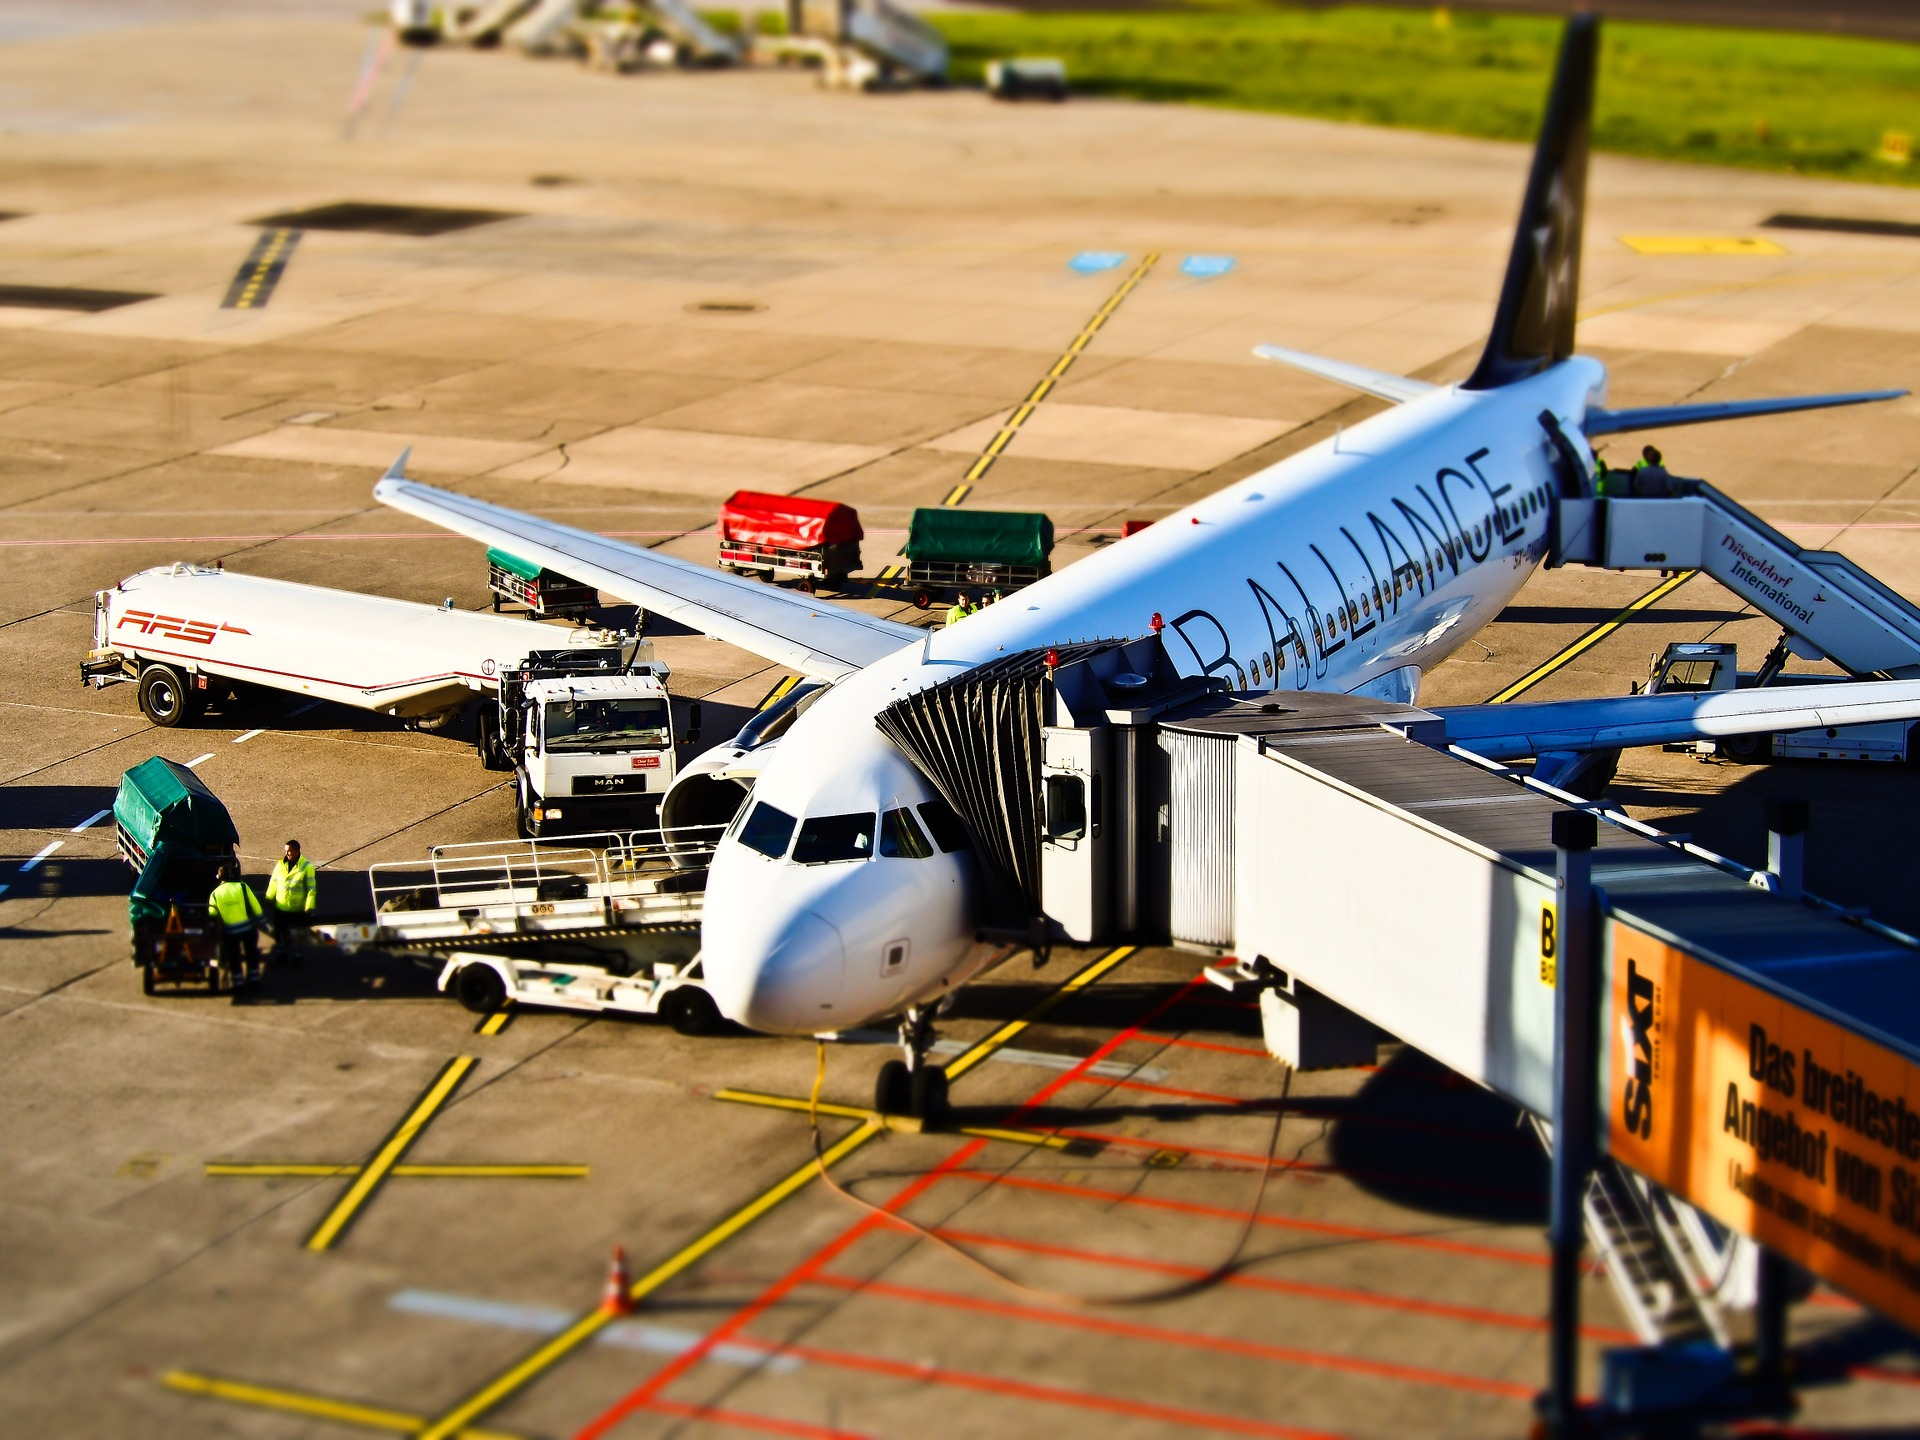

### Loading the Packages


In [202]:
# Data Handling
import pandas as pd, numpy as np

# Plotting
import matplotlib.pyplot as plt, seaborn as sns

# Data Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, ConfusionMatrixDisplay

# 2D Plotting
import umap

# Tomeks Links
from imblearn.under_sampling import TomekLinks

# Model Stuffs
import time
from sklearn.model_selection import train_test_split
# from sklearn.utils import class_weight

# Algorithms Used
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# Hyperparams
import optuna

# Feature Importances
import shap

# General Management
import gc as gc
gc.enable()
gc.collect()
from joblib import dump, load
from warnings import filterwarnings

# Notebook configurations
filterwarnings('ignore')
shap.initjs()

### Reading the Data

In [203]:
df_airline_train= pd.read_csv('train.csv')
df_airline_test = pd.read_csv('test.csv')

### Checking the Data

In [204]:
df_airline_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [205]:
df_airline_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [206]:
df_airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Updating the Target variable to int

In [207]:
df_airline_train['satisfaction'] = df_airline_train['satisfaction'].apply(lambda x : 1 if x.lower() == 'satisfied' else 0)

### Checking out Class Imbalance in train and test datasets`

In [208]:
df_airline_train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [209]:
#Checking out the class imbalance for train data set
df_airline_train['satisfaction'].value_counts(normalize=True)

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64

In [210]:
#Checking out the class imbalance for train data set
df_airline_test['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: satisfaction, dtype: float64

### There is class imbalance in both train and test datasets. Let's try to address the problem after clean up of data

### Dropping the columns that are not required

In [211]:
df_airline_train.drop(columns=['Unnamed: 0','id'],inplace=True,axis=1)
df_airline_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [212]:
df_airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### There is no clear explanation about the satisfication levels as 5 being highly satisfactory or 1 being satisfactory. We convert these columns into objects from ints

### Updating the object types of fields

In [278]:
types_dict= { 'Gender': object, 'Customer Type': object, 'Age': int, 'Type of Travel': object, 'Class':object,
             'Flight Distance': int, 'Inflight wifi service': object,'Departure/Arrival time convenient':object,
             'Ease of Online booking': object, 'Gate location':object,'Food and drink':object,'Online boarding':object,
             'Seat comfort':object,'Inflight entertainment':object,'On-board service':object, 'Leg room service':object,
             'Baggage handling':object, 'Checkin service':object, 'Inflight service':object, 'Cleanliness':object,
             'Departure Delay in Minutes':float,'Arrival Delay in Minutes': float ,'satisfaction':'bool'    
            }

In [214]:
df_airline_train=df_airline_train.astype(types_dict)


## Exploratory Data Analysis

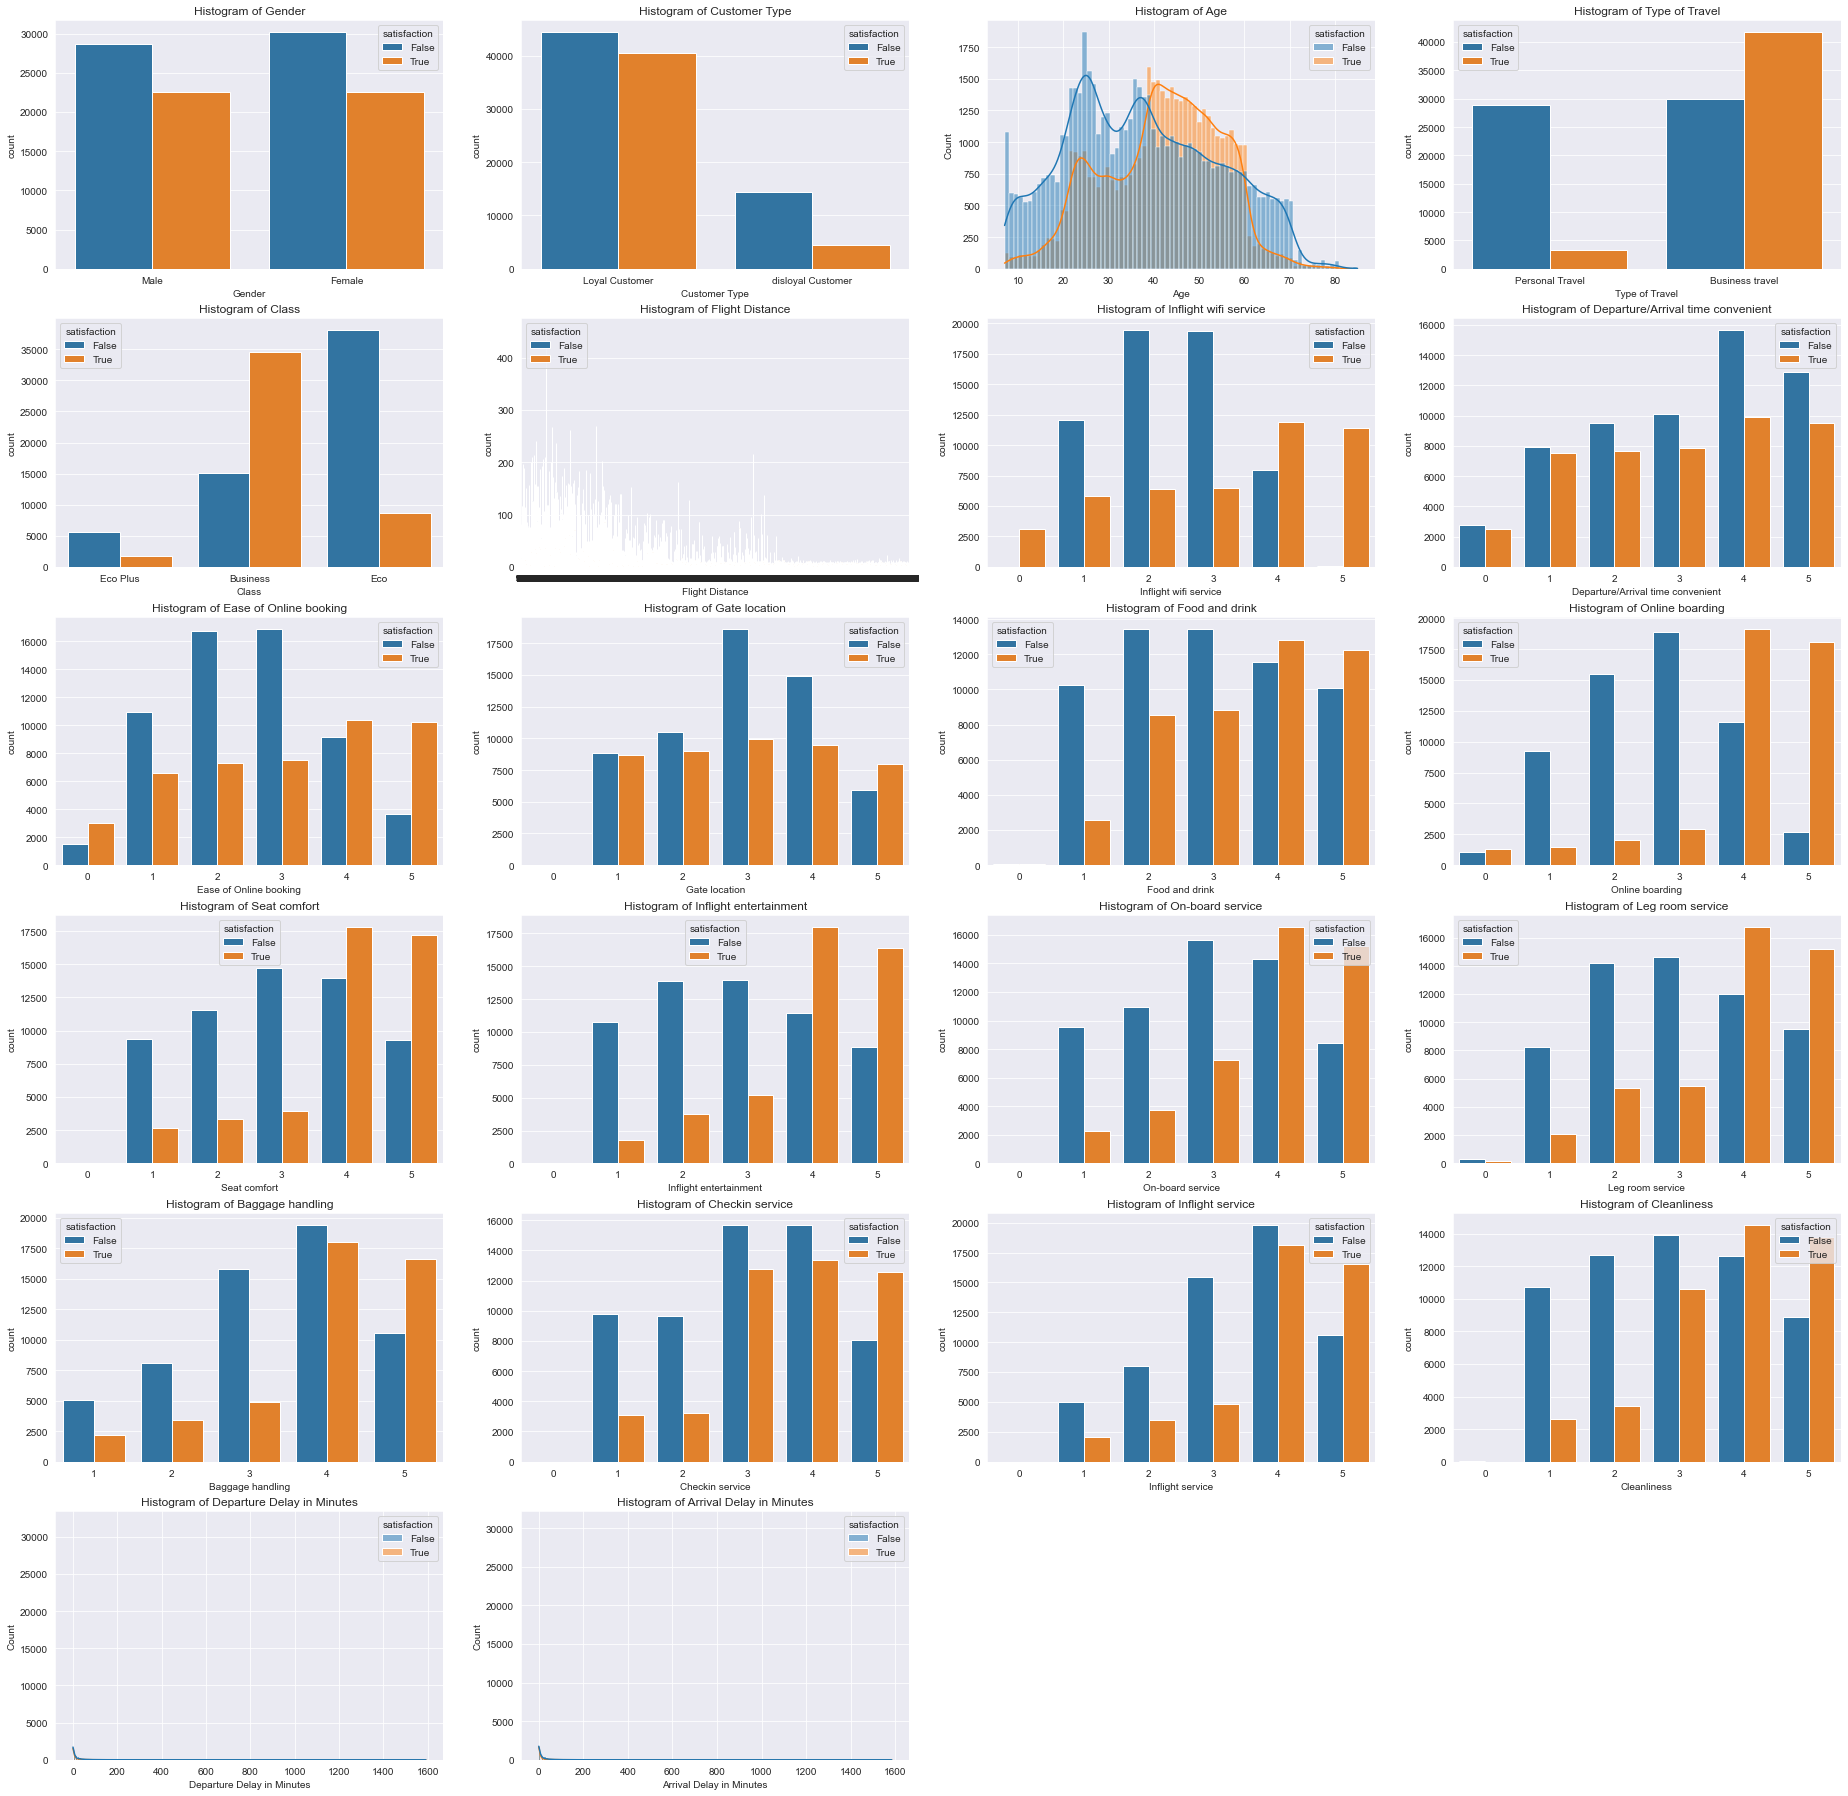

In [215]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(22,figsize=(32,32))
i=1

for col in [col for col in df_airline_train.columns if col != 'satisfaction']:
    plt.subplot(6,4,i)
    i+=1
    if df_airline_train[col].dtype in ('int64','float64'):
        sns.histplot(data=df_airline_train, x=col,hue=df_airline_train['satisfaction'], kde=True).set(title=("Histogram of {}".format(col)))
    else:
        sns.countplot(data=df_airline_train,x=col,hue='satisfaction').set(title=("Histogram of {}".format(col)))
plt.show()
    

#### Based on the findings in these charts for customers that are satisfied, gave value of Inflight wifi service a satisfaction level of 5 which implies 5 being the highest satisfaction and 0 being the lowest. So is that count of distribution of other variables like online boarding, online booking, baggage handling, inflight service etc

In [216]:
for col in df_airline_train.columns:
    if df_airline_train[col].dtype == 'object':
        df_pivot=pd.pivot_table(df_airline_train, index=['satisfaction'],
                              columns=col, aggfunc='size')
        print(df_pivot)
        print()
    else:
        print(df_airline_train[col].describe())
        print()


Gender        Female   Male
satisfaction               
False          30193  28686
True           22534  22491

Customer Type  Loyal Customer  disloyal Customer
satisfaction                                    
False                   44390              14489
True                    40533               4492

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

Type of Travel  Business travel  Personal Travel
satisfaction                                    
False                     29909            28970
True                      41746             3279

Class         Business    Eco  Eco Plus
satisfaction                           
False            15185  38044      5650
True             34480   8701      1844

Flight Distance  31    56    67    73    74    76    77    78    80    82    \
satisfaction                              

### Economy can contribute to a lot of things here like having smaller legroom, seat comfort, Inflight entertainment. It is really important to understand and figure out what the key drivers are. Discussing this with SME/stake holders can really give more insights into it.

### There are definitely outliers in Delay for arrivals and departure times. We will check it out using box whisker plots

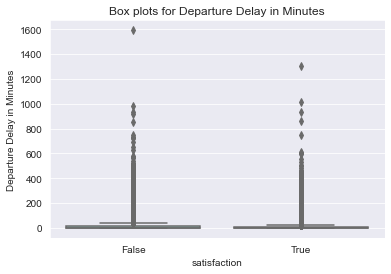

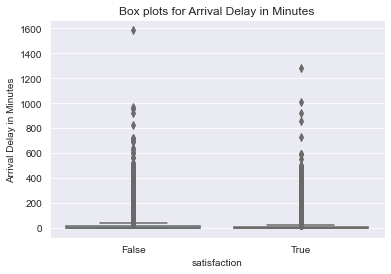

In [217]:
for col in df_airline_train.columns:
    if df_airline_train[col].dtype == 'float64':
        sns.boxplot(y=col, x="satisfaction", data=df_airline_train, palette="Set3").set(title="Box plots for {}".format(col))
    plt.show()

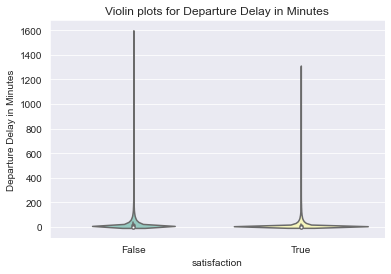

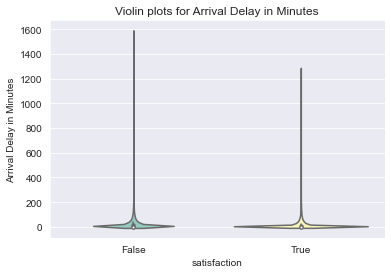

In [218]:
for col in df_airline_train.columns:
    if df_airline_train[col].dtype == 'float64':
        sns.violinplot(y=col, x="satisfaction", data=df_airline_train, palette="Set3").set(title="Violin plots for {}".format(col))
    plt.show()

###  Checking for any missing data

### Arrival Delay in Minutes' has null values, we need to update this column for null values by one of the null value imputation methods. Rest of the columns have no null values.¶

In [219]:
percent_missing = df_airline_train.isnull().sum() * 100 / len(df_airline_train)
missing_value_df = pd.DataFrame({'column_name': df_airline_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Gender,Gender,0.000000
Customer Type,Customer Type,0.000000
Age,Age,0.000000
Type of Travel,Type of Travel,0.000000
Class,Class,0.000000
Flight Distance,Flight Distance,0.000000
Inflight wifi service,Inflight wifi service,0.000000
Departure/Arrival time convenient,Departure/Arrival time convenient,0.000000
Ease of Online booking,Ease of Online booking,0.000000
Gate location,Gate location,0.000000



## Handle and Process the data

 ### Filling the Missing Values for Delay field

In [220]:
## Making the assumption that missing values implies that there were no delays
df_airline_train['Arrival Delay in Minutes'].fillna(0,inplace=True)

### Removing the outliers

In [221]:
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler(quantile_range=(20,80))
df_airline_train['Departure Delay in Minutes']= rscaler.fit_transform(df_airline_train['Departure Delay in Minutes'].to_numpy().reshape(-1, 1))
df_airline_train['Arrival Delay in Minutes']= rscaler.fit_transform(df_airline_train['Arrival Delay in Minutes'].to_numpy().reshape(-1, 1))


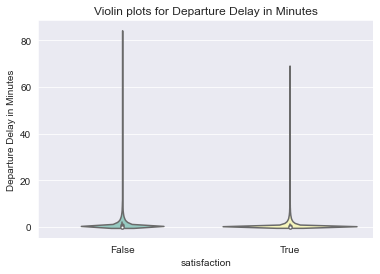

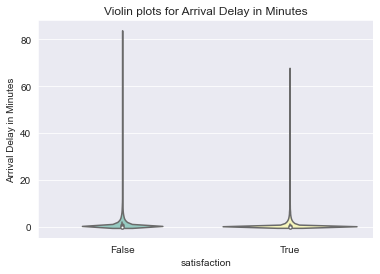

In [222]:
for col in df_airline_train.columns:
    if df_airline_train[col].dtype == 'float64':
        sns.violinplot(y=col, x="satisfaction", data=df_airline_train, palette="Set3").set(title="Violin plots for {}".format(col))
    plt.show()

### Trying one hot encoding for categorical variables

In [223]:
df_airline_train['Flight Distance'] = df_airline_train['Flight Distance'].astype('int')
df_airline_test['Flight Distance'] = df_airline_test['Flight Distance'].astype('int')

from sklearn.preprocessing import OneHotEncoder
cat_columns = [x for x in df_airline_train.columns if df_airline_train[x].dtype == 'object' ]
num_columns = [x for x in df_airline_train.columns if df_airline_train[x].dtype in ('int64','float64') ]
one_hot = OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore')
encoded_data = pd.DataFrame(data=one_hot.fit_transform(df_airline_train[cat_columns]),columns=one_hot.get_feature_names_out())
model_data = pd.concat([df_airline_train[num_columns],encoded_data], axis=1)

In [224]:
# Determine the categorical columns for the modeling dataframe
modeling_cat_cols = [col for col in model_data.columns if col not in ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'satisfaction']]

In [225]:
# Change types to category
for col in modeling_cat_cols:
    model_data[col] = model_data[col].astype('category')

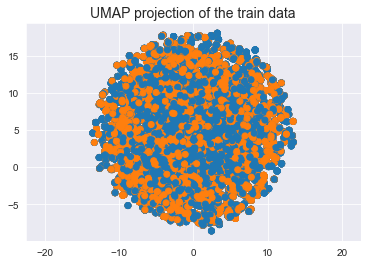

In [226]:
## We use UMAP for dimensionality reduction, it doesn't assume linear structure of the data. Umap taken the place of t-sne for embedding layers

import umap
model_cols= [x for x in model_data.columns if x != 'satisfaction']
trans = umap.UMAP(n_neighbors=5,n_components=2, random_state=42).fit_transform(model_data)

plt.scatter(
    trans[:, 0],
    trans[:, 1],
    c=[sns.color_palette()[x] for x in df_airline_train.satisfaction])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the train data', fontsize=14)
plt.show()

In [227]:
# For any of the encoded data, ensure it is boolean
for col in model_data.columns:
    if '-' in str(col):
        model_data[col]= model_data[col].astype('bool')

# Create a TomekLinks object to remove Tomek Links
# https://imbalanced-learn.org/stable/under_sampling.html#tomek-links
tmk = TomekLinks(sampling_strategy="all", n_jobs=3)

In [229]:
# Remove Tomek Links
X, y = tmk.fit_resample(model_data, df_airline_train['satisfaction'])
new_modeling_data = pd.DataFrame(data=X, columns=model_data.columns)

### Creating a function for testing out various classifiers
## Modelling

In [231]:
# Create list of classifiers to test

models = [
        RandomForestClassifier(random_state=100),
        AdaBoostClassifier(random_state=100),
        LGBMClassifier(is_unbalance=True, n_jobs=4, random_state=100),
        DecisionTreeClassifier(random_state=100),
        LogisticRegression(class_weight='balanced',random_state=46),
        RidgeClassifier(random_state=100)
        ]

In [232]:
# Function to test multiple classifiers
def train_classifiers(train_data, train_class, test_data,test_class, models):
    result = dict()
    for clf in models:
        name = clf.__class__.__name__
        
        print("Training the model {}".format(name))
        
        start_time=time.time()
        clf.fit(train_data,train_class)
        
        acc = accuracy_score(test_class,clf.predict(test_data))
        f1 = round(f1_score(test_class,clf.predict(test_data),average = 'weighted'),3)
        
        stop_time = time.time()
        
        time_run = stop_time-start_time
        
        result[name] = (acc,f1,time_run)
        
        print(' Stats for {} model are ... {}'.format(name,result[name]))
        
    return result

In [233]:
train_data, test_data, train_class, test_class = train_test_split(model_data,df_airline_train.satisfaction,test_size=0.3,random_state=53)

In [234]:
model_results=train_classifiers(train_data, train_class, test_data,test_class, models)

Training the model RandomForestClassifier
 Stats for RandomForestClassifier model are ... (0.9581675862953933, 0.958, 12.534832000732422)
Training the model AdaBoostClassifier
 Stats for AdaBoostClassifier model are ... (0.9150840497882715, 0.915, 6.069723129272461)
Training the model LGBMClassifier
 Stats for LGBMClassifier model are ... (0.9630116771461568, 0.963, 1.3166441917419434)
Training the model DecisionTreeClassifier
 Stats for DecisionTreeClassifier model are ... (0.9398498652636982, 0.94, 0.8500161170959473)
Training the model LogisticRegression
 Stats for LogisticRegression model are ... (0.8984024124214038, 0.899, 1.0226101875305176)
Training the model RidgeClassifier
 Stats for RidgeClassifier model are ... (0.9312203259335301, 0.931, 0.24689698219299316)


### Model Optimatization using Optuna

In [235]:
# Save off data for reading in by Optuna later
dump(value=[train_data, test_data, train_class, test_class], filename='data.joblib', compress=5)

['data.joblib']

In [236]:
# Quick function for reading in the data from serialized form
def get_data():
    data = load('data.joblib')
    return data

In [237]:
# Introductory use of Optuna

# Using Optuna to optimally select algorithm + parameters
def optimize_objective(trial):
    
    # Read in the data that each experiment will need
    data = get_data()
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]

    # Use Optuna to find the best algorithm to use
    algorithm = trial.suggest_categorical('algorithm', ['RF', 'LGBM'])

    # If it wants to use XGBoost, optimize the following parameters
    if algorithm == 'RF':
        criterion = trial.suggest_categorical('criterion', ['gini', 'log_loss','entropy'])
        max_depth = trial.suggest_int('max_depth', 3, 500)
        n_estimators = trial.suggest_int('n_estimators', 5, 100)

        model = RandomForestClassifier(class_weight='balanced', criterion=criterion, max_depth=max_depth, n_estimators=n_estimators, n_jobs=4, random_state=8)

    # Otherwise, it wants LGBM, so optimize these parameters
    else:
        lgbm_boosting = trial.suggest_categorical('lgbm_boosting', ['gbdt', 'dart', 'goss'])
        lgbm_num_iterations = trial.suggest_int('lgbm_num_ierations', 10, 1000)
        lgbm_learning_rate = trial.suggest_float('lgbm_learning_rate', 0.05, 0.99)

        model = LGBMClassifier(boosting_type=lgbm_boosting, num_iterations=lgbm_num_iterations, learning_rate=lgbm_learning_rate, n_jobs=4, random_state=8)

    # Fit and score the model
    model.fit(X_train, y_train)
    score = f1_score(y_true = y_test, y_pred = model.predict(X_test), average='weighted')

    # Return the model
    return score

In [238]:
# We want to maximize the score, i.e., the F-1
study = optuna.create_study(direction="maximize")
# Run Optuna a maximum of 10 times to find the best set of params for the best algo
study.optimize(optimize_objective, n_trials=10)

[I 2022-08-04 16:51:00,785] A new study created in memory with name: no-name-966d9d12-2ea5-47b3-a526-c774028bef23
[I 2022-08-04 16:51:02,422] Trial 0 finished with value: 0.7634884591962888 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'goss', 'lgbm_num_ierations': 394, 'lgbm_learning_rate': 0.9400691259866024}. Best is trial 0 with value: 0.7634884591962888.
[I 2022-08-04 16:51:19,022] Trial 1 finished with value: 0.9643305994991574 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'dart', 'lgbm_num_ierations': 559, 'lgbm_learning_rate': 0.4052605435639705}. Best is trial 1 with value: 0.9643305994991574.
[I 2022-08-04 16:51:21,246] Trial 2 finished with value: 0.957890868171668 and parameters: {'algorithm': 'RF', 'criterion': 'entropy', 'max_depth': 407, 'n_estimators': 72}. Best is trial 1 with value: 0.9643305994991574.
[I 2022-08-04 16:51:23,497] Trial 3 finished with value: 0.9637566829460653 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'gbdt', 'lgbm_num_i

In [239]:
# Quick function to get and sort the Optuna trials for the top-n
def get_optuna_trials(study, top_n):
    all_trials = study.get_trials()
    res_trials = {}
    for _t in all_trials:
        res_trials[_t.number] = (_t.value, _t.params)

    f_trials = sorted(res_trials.items(), key=lambda x: x[1][0], reverse=True)[:top_n]

    return f_trials

In [240]:
# Get the best trial
f_trials = get_optuna_trials(study, 1)
f_trials
dict_trial=f_trials[0][1][1]

In [168]:
    data = get_data()
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]

In [241]:
# Using optimal parameters, train a final model
final_model = LGBMClassifier(boosting_type=dict_trial['lgbm_boosting'], num_iterations=dict_trial['lgbm_num_ierations'], learning_rate=dict_trial['lgbm_learning_rate'])
final_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', learning_rate=0.11083704916001835,
               num_iterations=871)

In [242]:
# Print metrics
print(balanced_accuracy_score(y_test, final_model.predict(X_test)))
print(f1_score(y_test, final_model.predict(X_test)))

0.9635344523174381
0.9600633555832107


### Testing the model output


In [279]:
# Set types
test = df_airline_test.astype({k:v for k,v in types_dict.items() if k not in 'satisfaction'})

In [280]:
# Format the testing data like we did for training
testing_labels = [1 if x=='satisfied' else 0 for x in test['satisfaction']]
test.drop(['Unnamed: 0', 'id', 'satisfaction'], inplace=True, axis=1)

In [281]:
# Use the SAME OHE object from earlier, and .transform!!
testing_encoded_data = pd.DataFrame(data=one_hot.transform(test[cat_columns]), columns=one_hot.get_feature_names_out())

# Create a dataframe of the data prepped for modeling
test_modeling_data = pd.concat([test[num_columns], testing_encoded_data], axis=1)

# Change types to category
for col in modeling_cat_cols:
    test_modeling_data[col] = test_modeling_data[col].astype('category')

In [282]:
# Print metrics
print(balanced_accuracy_score(testing_labels, final_model.predict(test_modeling_data)))
print(f1_score(testing_labels, final_model.predict(test_modeling_data)))

0.9631349022357445
0.9598824524689434


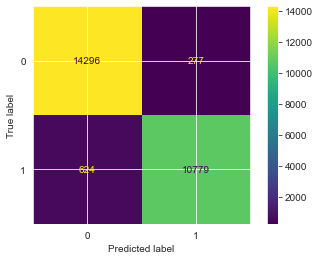

In [283]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(final_model, test_modeling_data, testing_labels)

In [284]:
# Run SHAP Calculations
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(test_modeling_data)

In [285]:
# NumPy magic to convert shap vals to usable format
abs_mean_shap = np.mean(np.array([np.absolute(np.array(shap_values[0])), np.absolute(np.array(shap_values[1]))]), axis=0)

In [286]:
# Get a dataframe of the shap values for each feature, for each sample
# Then, create an average per feature
shap_df = pd.DataFrame(data=abs_mean_shap, columns=X_test.columns)
shap_avg_df = pd.DataFrame(shap_df.mean().to_dict(),index=[shap_df.index.values[-1]])

In [287]:
# Reformat the dataframe
shap_plot_df = shap_avg_df.T.reset_index()
shap_plot_df.columns = ['Feature', 'Mean ABS SHAP']

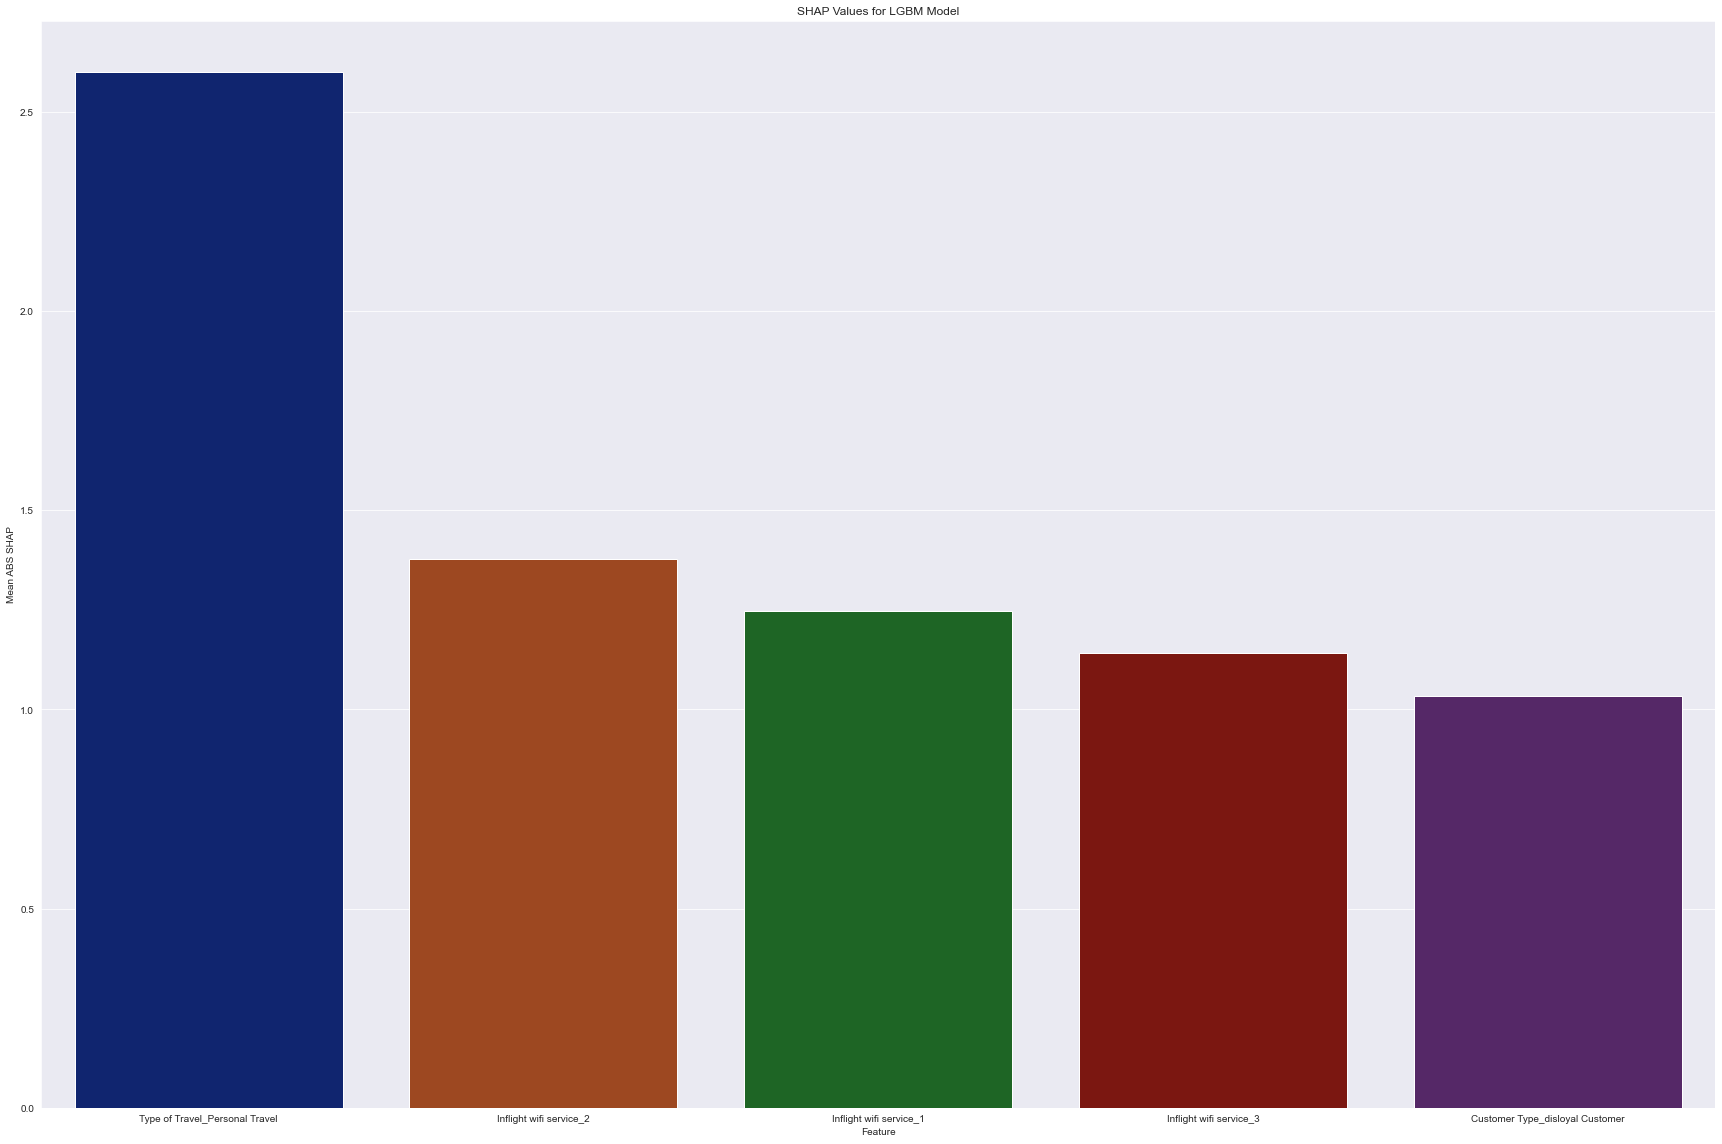

In [288]:
# Create a top 5 plot
plt.figure(figsize=(30, 20))
sns.barplot(data=shap_plot_df.sort_values(by='Mean ABS SHAP', ascending=False).head(n=5), x='Feature', y='Mean ABS SHAP', palette="dark").set(title="SHAP Values for LGBM Model")
plt.show()

### We identify that Types of Travel, Inflight wifi service and Loyalty of the customer play a major role in contributing to the decision of the model using SHAP mean values